# Assignment

This assignment aims to deepen your understanding of Bayesian Classifiers and Gaussian Mixture Models (GMMs) through practical implementation.


## Part 1: Bayesian Classifiers

1. **Dataset Selection**
   - Consider your project dataset.

2. **Data Preprocessing**
   - Perform necessary data preprocessing steps, including handling missing values, encoding categorical variables, and splitting the data into training and test sets.

3. **Implementation**
   - Implement a Naive Bayes classifier using a library  Scikit-learn (if your project is about classification) or Bayesian Ridge Regressor or another suitable regression model like Linear Regression (if your project is a regression problem). Train the model on your training dataset and evaluate its performance using accuracy, precision, recall, and F1 score ( for classification) or Mean Squared Error (MSE)and $R^2$ score (for regression problem).

4. **Results Interpretation**
   - Analyze and interpret the results of your model. Discuss what the metrics imply about your classifier’s or regressor's performance. Include confusion matrices if necessary.

5. **Reflection**
   - Write a brief reflection  on your experience with Bayesian classifiers or Bayesian Ridge Regressor. Discuss any challenges you faced and how you overcame them. Write it in your notebook using the **Markdown** or **text** cell.



## Part 2: Gaussian Mixture Models (GMMs)

1. **Data Generation**
   - Generate synthetic data using five Gaussian distributions. Plot the data and visualize the distinct clusters.

2. **GMM Implementation**
   - Fit a Gaussian Mixture Model to the generated synthetic data. Print and interpret the means, covariances, and mixing coefficients of the components.

3. **Cluster Assignment**
   - Use the fitted GMM to predict the labels for the data points. Visualize the results by plotting the data points and the GMM components.


4. **Reflection**
   - Write a brief reflection on your experience with GMMs. Discuss any difficulties you encountered during the implementation and how you addressed them.


### Submission Guidelines
- Compile your two tasks into a single document or Jupyter notebook. you can create a new notebook or do it in this notebook ( at the end)

- Ensure that your code is well-documented, with comments explaining key steps.

- Include visualizations as necessary to support your findings.

- **THIS ASSIGNEMNT WILL BE DONE IN GROUP. SUBMIT ONE ASSIGNMENT PER GROUP (SO ONLY ONE PERSON IN THE GROUP WILL SUBMIT) AND ADD ALL GROUP MEMBERS AT THE HEAD OF THE NOTEBOOK**

In [148]:
import pandas as pd

# Create a DataFrame
data = pd.read_csv('./data/cleaned_data.csv')
df = pd.DataFrame(data=data)

# Display the first few rows of the DataFrame
df.head()

,SampleID,Actinobacteria,Bacteroides,Bacteroidetes,Bifidobacterium,Clostridium,Cyanobacteria,Firmicutes,Fusobacteria,Lactobacillus,Other,Prevotella,Proteobacteria,Tenericutes,Verrucomicrobia,Fiber_intake_g,Fat_intake_g,Iron_intake_mg,Serum_iron_ug
0,000007117.1075649,0.3244,0.0013,0.0315,0.0000,0.0013,0.0352,0.2629,0.0082,0.0027,0.0461,0.0028,0.2821,0.0010,0.0005,20.90,84.43,15.25,103.58
1,000007115.1075661,0.0347,0.0087,0.1735,0.0018,0.0149,0.0289,0.1783,0.0032,0.0166,0.0153,0.0025,0.5196,0.0000,0.0020,18.87,85.39,12.39,79.21
2,000007123.1075697,0.0493,0.0000,0.0153,0.0000,0.0002,0.1265,0.0451,0.0025,0.1222,0.0024,0.0007,0.6347,0.0000,0.0011,12.96,65.19,18.19,114.48
3,000009713.1130401,0.4052,0.0010,0.0091,0.0000,0.0002,0.0265,0.4219,0.0026,0.0015,0.0055,0.0062,0.1191,0.0000,0.0012,45.61,101.71,14.05,127.06
4,000005598.1130569,0.2394,0.0072,0.0401,0.0001,0.0010,0.0255,0.2582,0.0013,0.0170,0.0209,0.0024,0.3828,0.0003,0.0038,24.82,95.34,16.97,81.79


In [149]:
print(df["Serum_iron_ug"].describe())

count    2512.000000
mean       85.956568
std        30.580690
min         5.000000
25%        65.272500
50%        85.150000
75%       106.870000
max       196.710000
Name: Serum_iron_ug, dtype: float64


In [150]:
from sklearn.model_selection import train_test_split

target_column = 'Serum_iron_ug'

X = df.drop(columns=[target_column, "SampleID"])
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

model = BayesianRidge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df

Mean Squared Error: 874.07
R^2 Score: 0.10


,Feature,Coefficient
16,Iron_intake_mg,1.228883
14,Fiber_intake_g,0.455094
15,Fat_intake_g,-0.311315
10,Prevotella,0.171128
1,Bacteroides,-0.108955
6,Firmicutes,-0.101769
0,Actinobacteria,0.049786
5,Cyanobacteria,0.047998
11,Proteobacteria,-0.036245
7,Fusobacteria,0.027579


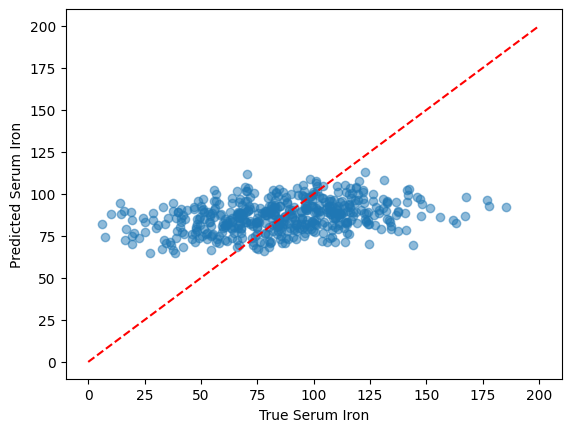

In [152]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Serum Iron")
plt.ylabel("Predicted Serum Iron")
plt.plot([0, 200], [0, 200], 'r--')  # 45-degree line
plt.show()

The mean squared error is quite large, meaning predictions are often far from the true values. The $R^2$ score indicates that the model explains only 5% of the variance in the dataset. Looking at the coefficients, dietary factors have the largest effects, with iron intake having the largest positive effect. Microbiome features have small coefficients, suggesting weak linear influence on simulated serum iron.

Plotting the predicted vs true serum iron levels, we can see that the predictions all fall within a narrow range of 55 to 100. This is because Bayesian Ridge Regression applies regularisation, meaning it shrinks coefficients towards 0 when the model is uncertain about their true values and hence relies more on the mean, which in our case is ~75. This explains the low $R^2$, since the model is predicting the average for nearly all samples, and explains almost none of the variance.

Overall the model shows limited predictive performance. This is largely because our simulation included a large random baseline, and most features have small linear effects relative to the noise. Bayesian Ridge is a linear model so it should be an appropriate choice since our simulation is based on additive linear relationships. However, the comination of weak signals and substantial random variation prevents the model from capturing meaningful differences, resulting in predictions that are tightly clustered around the mean and a very low $R^2$. In a real dataset, more complex or nonlinear relationships might exist, in which case more flexible models could be considered.

Based on this, we could consider reducing the noise in the simulation to try and train a more meaningful model. We could also explore feature selection, such as removing very weak features to reduce noise.
